In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

- 유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도
(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을
구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.

- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)

# KNN

### 스텝1 - 자료와 패키지 불러오기, 데이터 구성하기

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [5]:
path = '/home/piai/Downloads/big_data/'

df_raw = pd.read_csv(path + '유방암.csv')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [7]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
# 데이터에 대해서 학습, 검증, 테스트 데이터로 분할한다.
X = df_raw.drop('diagnosis', axis = 1)
Y = df_raw['diagnosis']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 1234)
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size = 0.4, random_state = 1234)

In [9]:
# 분리된 데이터셋의 (행, 열)을 살펴보면 다음과 같다.
print(trainX.shape)
print(trainY.shape)
print(validX.shape)
print(validY.shape)
print(testX.shape)
print(testY.shape)

(238, 30)
(238,)
(160, 30)
(160,)
(171, 30)
(171,)


### 스텝2 - 모델 생성

In [54]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(trainX, trainY)

print('트레이닝셋 정확도:{:.3f}'.format(knn_uncustomized.score(trainX,trainY)))
print('검증셋 정확도:{:.3f}'.format(knn_uncustomized.score(validX,validY)))

트레이닝셋 정확도:0.954
검증셋 정확도:0.919


In [13]:
# 테스트셋과 트레이닝셋 정확도는 좋은 성능을 보인다.
# 파라미터 튜닝을 통해 이를 더 개선시킬 수 있는지에 대해서 살펴보자.

In [27]:
# k수 증가에 따른 정확도 변화를 살펴본다.
train_accuracy_neighbors, valid_accuracy_neighbors = [], []
para_n_neighbors = [i for i in range(1,25)]

for para_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = para_neighbors)
    knn.fit(trainX,trainY)
    train_accuracy_neighbors.append(knn.score(trainX,trainY))
    valid_accuracy_neighbors.append(knn.score(validX,validY))

In [31]:
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['n_neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy_neighbors
df_accuracy_neighbors['ValidAccuracy'] = valid_accuracy_neighbors

In [29]:
df_accuracy_neighbors.round(3)

,n_estimators,TrainAccuracy,ValidAccuracy
0,1,1.000,0.900
1,2,0.975,0.906
2,3,0.962,0.919
3,4,0.950,0.919
4,5,0.954,0.919
5,6,0.945,0.919
6,7,0.958,0.919
7,8,0.954,0.919
8,9,0.954,0.919
9,10,0.941,0.925


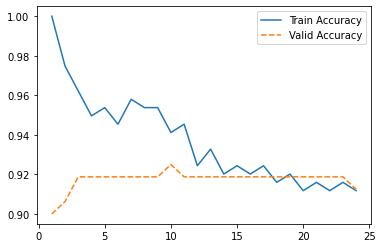

In [30]:
plt.plot(para_n_neighbors, train_accuracy_neighbors, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, valid_accuracy_neighbors, linestyle='--', label = 'Valid Accuracy')
plt.legend()

In [33]:
# k의 수가 늘어날수록 오히려 과소적합이 일어나고 있다.
# 훈련 데이터셋과 테스트 데이터셋의 정확도가 모두 높은 7을 선택하도록 한다.

In [41]:
# k수 증가에 따른 정확도 변화를 살펴본다.
train_accuracy_neighbors, valid_accuracy_neighbors = [], []
para_n_neighbors = [i for i in range(1,25)]

for para_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = para_neighbors)
    knn.fit(trainX,trainY)
    train_accuracy_neighbors.append(knn.score(trainX,trainY))
    valid_accuracy_neighbors.append(knn.score(validX,validY))

In [42]:
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['n_neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy_neighbors
df_accuracy_neighbors['ValidAccuracy'] = valid_accuracy_neighbors
df_accuracy_neighbors.round(3)

,n_neighbors,TrainAccuracy,ValidAccuracy
0,1,1.000,0.900
1,2,0.975,0.906
2,3,0.962,0.919
3,4,0.950,0.919
4,5,0.954,0.919
5,6,0.945,0.919
6,7,0.958,0.919
7,8,0.954,0.919
8,9,0.954,0.919
9,10,0.941,0.925


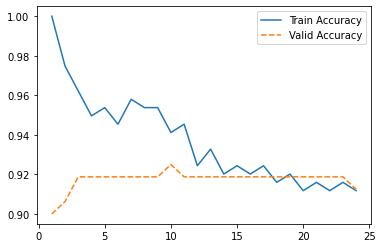

In [43]:
plt.plot(para_n_neighbors, train_accuracy_neighbors, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, valid_accuracy_neighbors, linestyle='--', label = 'Valid Accuracy')
plt.legend()

In [ ]:
# neighbor의 수를 5개로 선택하도록 한다.
# 개수가 많아질수록 정확도가 낮아진다.

In [68]:
# train 및 test 정확도 결과 저장용 - 가중치별 이웃 수 증가에 따른 정확도 변화
train_accuracy_weight, valid_accuracy_weight = [], []
para_n_neighbors = [i for i in range(1,11)]

para_weights = (['uniform']) * 10 + (['distance'] *10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(trainX,trainY)
    train_accuracy_weight.append(knn.score(trainX,trainY))
    valid_accuracy_weight.append(knn.score(validX,validY))
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy_weight
df_accuracy_weights['ValidAccuracy'] = valid_accuracy_weight
df_accuracy_weights.round(3)

ValueError: Length of values (20) does not match length of index (10)

In [66]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',columns = 'Weights',
                                                     values = ['TrainAccuracy', 'ValidAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           ValidAccuracy         
Weights        distance   uniform      distance  uniform
Neighbors                                               
1                   NaN  1.000000           NaN  0.90000
2                   NaN  0.974790           NaN  0.90625
3                   NaN  0.962185           NaN  0.91875
4                   NaN  0.949580           NaN  0.91875
5                   NaN  0.953782           NaN  0.91875
6                   NaN  0.945378           NaN  0.91875
7                   NaN  0.957983           NaN  0.91875
8                   NaN  0.953782           NaN  0.91875
9                   NaN  0.953782           NaN  0.91875
10                  NaN  0.941176           NaN  0.92500
11             0.945378       NaN       0.91875      NaN
12             0.924370       NaN       0.91875      NaN
13             0.932773       NaN       0.91875      NaN
14             0.920168       NaN       0.91875      NaN
15             0.924370       NaN       0.91875      NaN
16             0.920168       NaN       0.91875      NaN
17             0.924370       NaN       0.91875      NaN
18             0.915966       NaN       0.91875      NaN
19             0.920168       NaN       0.91875      NaN
20             0.911765       NaN       0.91875      NaN

In [67]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidAccuracy_distance,ValidAccuracy_uniform
Neighbors,,,,
1,NaN,1.000000,NaN,0.90000
2,NaN,0.974790,NaN,0.90625
3,NaN,0.962185,NaN,0.91875
4,NaN,0.949580,NaN,0.91875
5,NaN,0.953782,NaN,0.91875
